In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('pet.csv')

In [5]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


### Data Cleaning ###

In [78]:
df = df.drop('category', axis=1)

In [79]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,product_id,animal,size,price,sales,rating,repeat_purchase,Total Sales
20,21,Fish,medium,unlisted,542.06,NaN,0,0.00
44,45,Bird,medium,unlisted,1209.41,NaN,0,0.00
46,47,Cat,small,unlisted,1367.47,NaN,1,1367.47
70,71,Dog,large,unlisted,1446.43,NaN,0,0.00
73,74,Bird,large,unlisted,1864.01,NaN,0,0.00


In [80]:
condition = (df['size'] == 'unlisted') | pd.isna(df['rating'])
df_filtered = df[~condition]
print(df_filtered.head())

   product_id animal    size  price    sales  rating  repeat_purchase  \
0           1   Bird   large   51.1  1860.62     7.0                1   
1           2   Bird  medium  35.98   963.60     6.0                0   
2           3    Dog  medium  31.23   898.30     5.0                1   
3           4    Cat   small  24.95   982.15     6.0                1   
4           5    Cat   small  26.18   832.63     7.0                1   

   Total Sales  
0      1860.62  
1         0.00  
2       898.30  
3       982.15  
4       832.63  


In [81]:
condition = (df['animal'] == 'Bird') & (df['size'] == 'large')
df['Total Sales'] = condition * df['repeat_purchase'] * df['sales']

In [82]:
print(df)

      product_id animal    size  price    sales  rating  repeat_purchase  \
0              1   Bird   large   51.1  1860.62     7.0                1   
1              2   Bird  medium  35.98   963.60     6.0                0   
2              3    Dog  medium  31.23   898.30     5.0                1   
3              4    Cat   small  24.95   982.15     6.0                1   
4              5    Cat   small  26.18   832.63     7.0                1   
...          ...    ...     ...    ...      ...     ...              ...   
1495        1496   Bird  medium  40.91  1203.36     5.0                0   
1496        1497    Dog   small  32.89  1099.97     5.0                0   
1497        1498   Fish   small  25.79   724.02     3.0                0   
1498        1499   Fish   small  19.94   658.66     5.0                1   
1499        1500    Cat  medium  25.95   826.08     4.0                1   

      Total Sales  
0         1860.62  
1            0.00  
2            0.00  
3      

In [83]:
show_animals = df['animal'].drop_duplicates()

In [84]:
print(show_animals.head())

0    Bird
2     Dog
3     Cat
8    Fish
Name: animal, dtype: object


In [85]:
value_mapping = {
    'MEDIUM': 'medium',
    'Medium': 'medium',
    'LARGE': 'large',
    'Large': 'large',
    'SMALL': 'small',
    'Small': 'small'
}

In [86]:
df['size'] = df['size'].replace(value_mapping)

### THE TOTAL REVENUE OF BIRD PER SIZE ###

In [87]:
df['Total Sales'] = df['repeat_purchase'] * df['sales']
result = df.groupby(['animal', 'size'])['Total Sales'].sum().reset_index().drop_duplicates()
bird_result = result[result['animal'] == 'Bird']
print(bird_result)

  animal    size  Total Sales
0   Bird   large     78720.55
1   Bird  medium     52103.36
2   Bird   small     25471.01


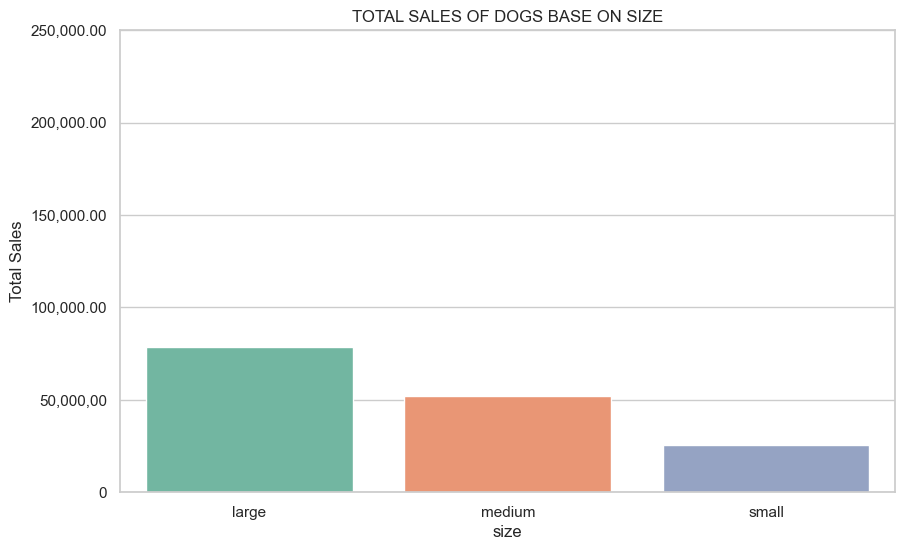

In [88]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
X = sns.barplot(x='size', y='Total Sales', data=bird_result,palette='Set2')
plt.title('TOTAL SALES OF DOGS BASE ON SIZE')
plt.yticks([0,50000,100000,150000,200000,250000],
          ['0','50,000,00','100,000.00','150,000.00','200,000.00','250,000.00'])
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()


### THE TOTA REVENUE OF DOG PER SIZE  ###

In [89]:
df.head()

,product_id,animal,size,price,sales,rating,repeat_purchase,Total Sales
0,1,Bird,large,51.1,1860.62,7.0,1,1860.62
1,2,Bird,medium,35.98,963.60,6.0,0,0.00
2,3,Dog,medium,31.23,898.30,5.0,1,898.30
3,4,Cat,small,24.95,982.15,6.0,1,982.15
4,5,Cat,small,26.18,832.63,7.0,1,832.63


In [90]:
result = df.groupby(['animal','size'])['Total Sales'].sum().reset_index().drop_duplicates()
dog_result = result[result['animal'] == 'Dog']
print(dog_result)

  animal    size  Total Sales
6    Dog   large     68145.85
7    Dog  medium     71182.58
8    Dog   small     76669.16


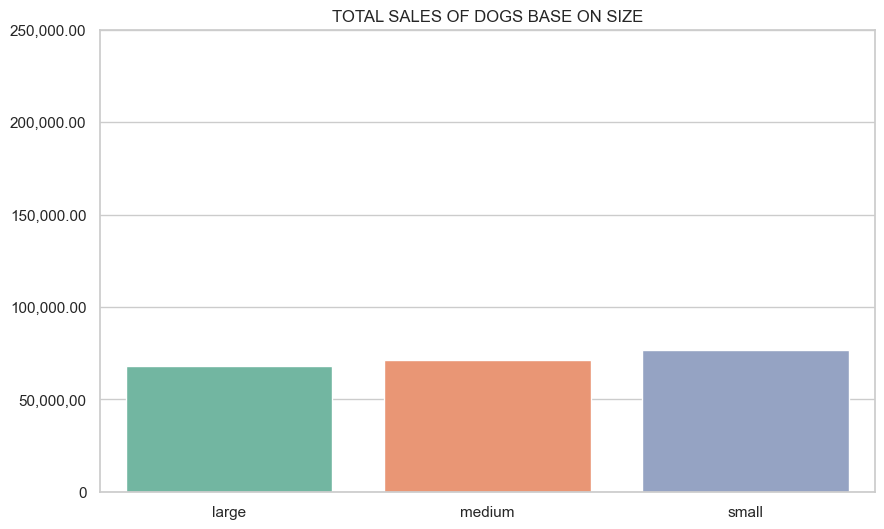

In [91]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax=sns.barplot(x='size', y='Total Sales', data=dog_result,palette='Set2')
plt.title('TOTAL SALES OF DOGS BASE ON SIZE')
plt.yticks([0,50000,100000,150000,200000,250000],
          ['0','50,000,00','100,000.00','150,000.00','200,000.00','250,000.00'])
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

### TOTAL REVENUE PER CAT SIZE ###

In [92]:
result = df.groupby(['animal','size'])['Total Sales'].sum().reset_index().drop_duplicates()
cat_result = result[result['animal']== 'Cat']
print(cat_result)

  animal    size  Total Sales
3    Cat   large     19258.91
4    Cat  medium     76190.13
5    Cat   small    247922.12


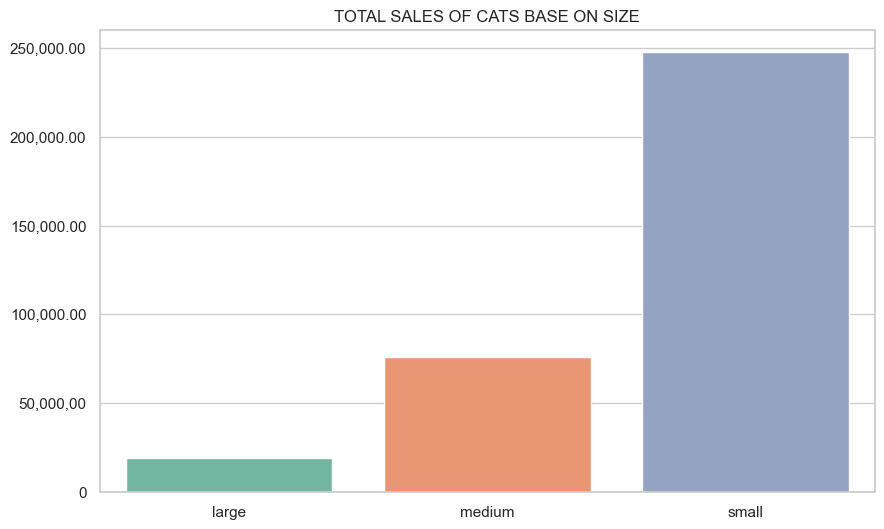

In [93]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='size', y='Total Sales', data=cat_result,palette='Set2')
plt.title('TOTAL SALES OF CATS BASE ON SIZE')
plt.yticks([0,50000,100000,150000,200000,250000],
          ['0','50,000,00','100,000.00','150,000.00','200,000.00','250,000.00'])
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

### TOTAL REVENUE PER FISH SIZE ###

In [94]:
result = df.groupby(['animal','size'])['Total Sales'].sum().reset_index().drop_duplicates()
fish_result = result[result['animal']== 'Fish']
print(cat_result)

  animal    size  Total Sales
3    Cat   large     19258.91
4    Cat  medium     76190.13
5    Cat   small    247922.12


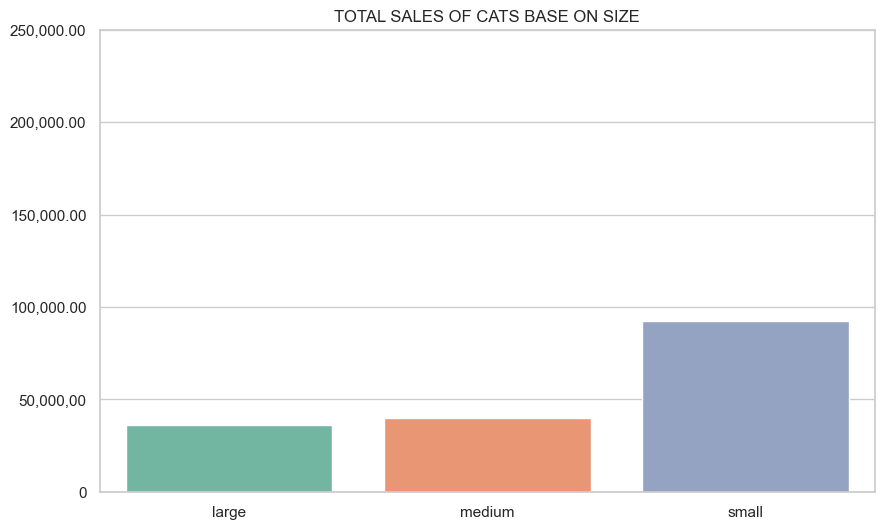

In [95]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='size', y='Total Sales', data=fish_result,palette='Set2')
plt.title('TOTAL SALES OF CATS BASE ON SIZE')
plt.yticks([0,50000,100000,150000,200000,250000],
          ['0','50,000,00','100,000.00','150,000.00','200,000.00','250,000.00'])
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

### TOTAL REVENU BASE ON ANIMAL AND SIZE ###


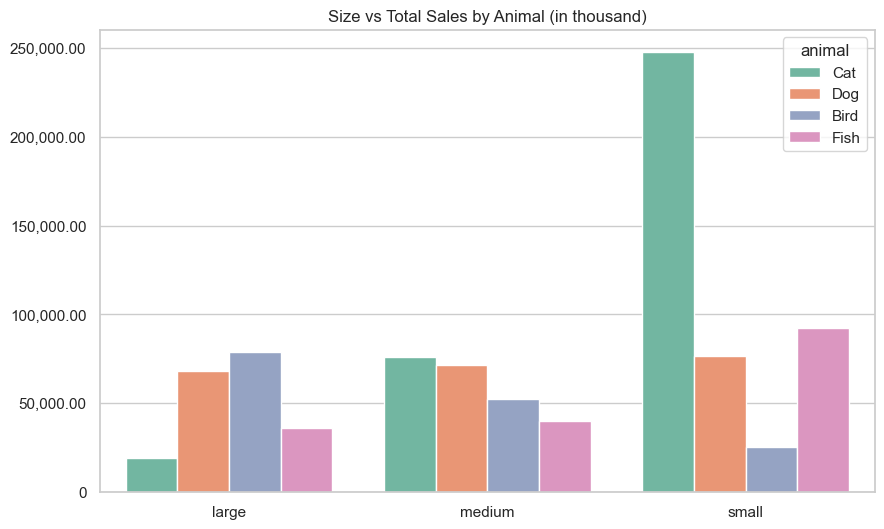

In [96]:
combined_result = pd.concat([cat_result, dog_result, bird_result, fish_result])
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='size', y='Total Sales', hue='animal', data=combined_result, palette='Set2')
plt.title('Size vs Total Sales by Animal (in thousand)')
plt.yticks([0, 50000, 100000, 150000, 200000, 250000],
           ['0', '50,000.00', '100,000.00', '150,000.00', '200,000.00', '250,000.00'])
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.show()

### TOTAL REVENUE  ###

In [102]:
animal_total_revenue = df.groupby('animal')['Total Sales'].sum().reset_index()
print(animal_total_revenue)

  animal  Total Sales
0   Bird    156294.92
1    Cat    343371.16
2    Dog    215997.59
3   Fish    168382.50


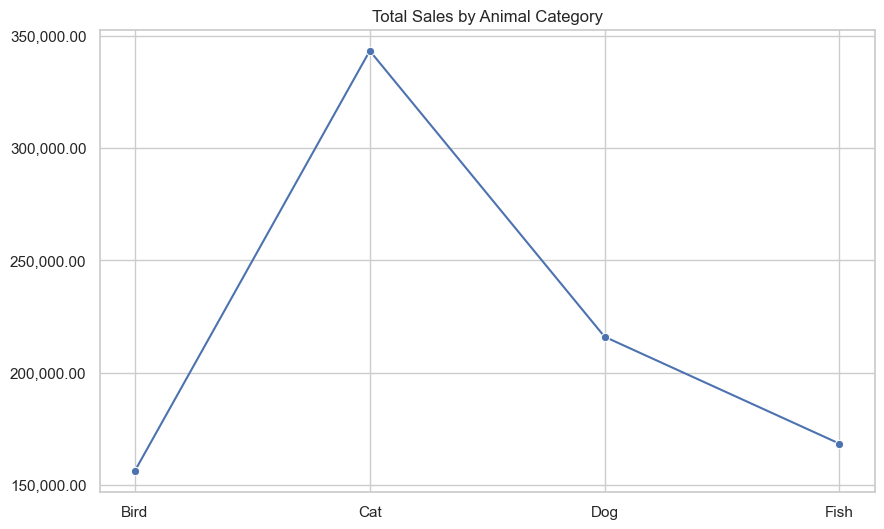

In [119]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.lineplot(x='animal', y='Total Sales', data=animal_total_revenue, marker='o')
plt.title('Total Sales by Animal Category')
plt.yticks([150000,200000,250000,300000,350000],
          ['150,000.00','200,000.00','250,000.00','300,000.00','350,000.00'])
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.grid(True)
plt.show()

In [97]:
df.head()

,product_id,animal,size,price,sales,rating,repeat_purchase,Total Sales
0,1,Bird,large,51.1,1860.62,7.0,1,1860.62
1,2,Bird,medium,35.98,963.60,6.0,0,0.00
2,3,Dog,medium,31.23,898.30,5.0,1,898.30
3,4,Cat,small,24.95,982.15,6.0,1,982.15
4,5,Cat,small,26.18,832.63,7.0,1,832.63


### ANIMAL RATING ###

In [99]:
animal_highest_rating = df.groupby('animal')['rating'].sum().reset_index()
print(animal_highest_rating)

  animal  rating
0   Bird   846.0
1    Cat  2830.0
2    Dog  1548.0
3   Fish  1514.0


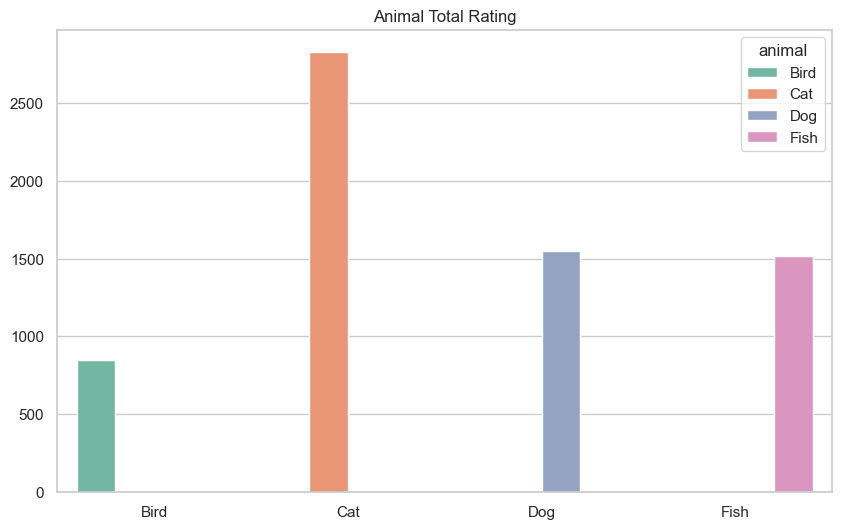

In [100]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
ax =sns.barplot(x='animal',y='rating', hue='animal', data=animal_highest_rating, palette='Set2')
plt.title('Animal Total Rating')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()
